### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [56]:
data = pd.read_csv('data/coupons.csv')

In [57]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

Use summary statistics or data visualization to identify columns with missing values. Python libraries like Pandas provide functions like isnull() or info() to check for missing values. Python libraries like Pandas provide functions like isnull() or info() to check for missing values.co

In [59]:
# Identify missing values
missing_values = data.isnull().sum().sort_values()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


Use heatmaps or bar charts to visualize missing data patterns. This can provide a quick overview of which columns have the most missing values.

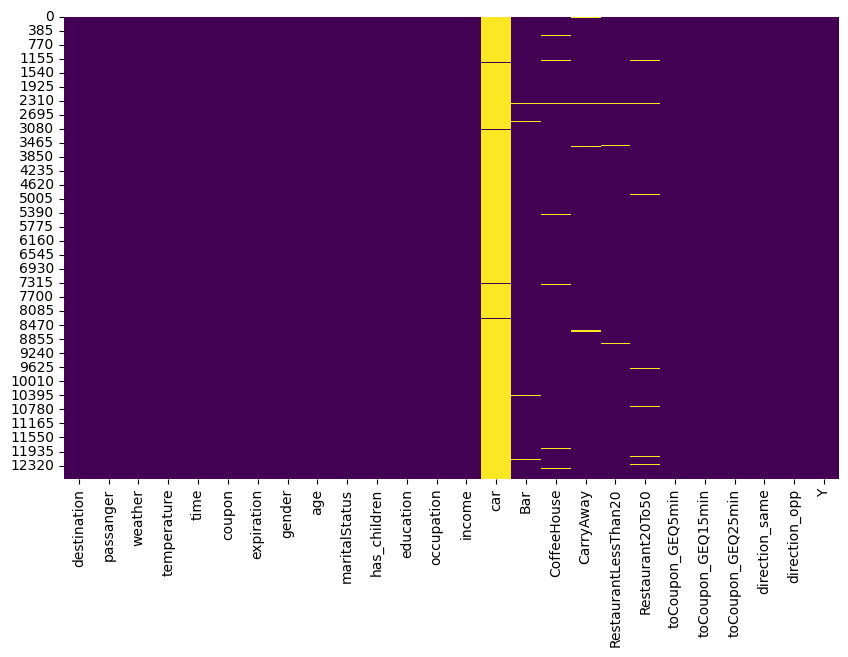

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [61]:
### Replace data
data['coupon'] = data['coupon'].str.replace('Restaurant(<20)', 'RestaurantLess20')
data['coupon'] = data['coupon'].str.replace('Restaurant(20-50)', 'Restaurant20to50')
data['coupon'] = data['coupon'].str.replace('Carry out & Take away', 'CarryAway')
data['coupon'] = data['coupon'].str.replace('Coffee House', 'CoffeeHouse')
data['passanger'] = data['passanger'].str.replace('(', '')
data['passanger'] = data['passanger'].str.replace(')', '')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('4~8', '4to8')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace('1~3', '1to3')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('1~3', '1to3')
data['Restaurant20To50'] = data['Restaurant20To50'].str.replace('4~8', '4to8')
data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('1~3', '1to3')
data['CoffeeHouse'] = data['CoffeeHouse'].str.replace('4~8', '4to8')
data['CarryAway'] = data['CarryAway'].str.replace('1~3', '1to3')
data['CarryAway'] = data['CarryAway'].str.replace('4~8', '4to8')

In [62]:
### Rename columns
data.rename(columns = {'Y':'acceptance'}, inplace = True)

In [63]:
### Delete unused columns
data = data.drop(columns=['car'])
data = data.drop(columns=['toCoupon_GEQ5min'])
data = data.drop(columns=['toCoupon_GEQ15min'])
data = data.drop(columns=['toCoupon_GEQ25min'])
data = data.drop(columns=['direction_same'])
data = data.drop(columns=['direction_opp'])

In [65]:
#Create a new category for missing values
data['Bar'].fillna('Unknown', inplace=True)
data['RestaurantLessThan20'].fillna('Unknown', inplace=True)
data['CarryAway'].fillna('Unknown', inplace=True)
data['Restaurant20To50'].fillna('Unknown', inplace=True)
data['CoffeeHouse'].fillna('Unknown', inplace=True)

data.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,acceptance
0,No Urgent Place,Alone,Sunny,55,2PM,RestaurantLess20,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4to8,1to3,1
1,No Urgent Place,Friends,Sunny,80,10AM,CoffeeHouse,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4to8,1to3,0
2,No Urgent Place,Friends,Sunny,80,10AM,CarryAway,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4to8,1to3,1
3,No Urgent Place,Friends,Sunny,80,2PM,CoffeeHouse,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4to8,1to3,0
4,No Urgent Place,Friends,Sunny,80,2PM,CoffeeHouse,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4to8,1to3,0
5,No Urgent Place,Friends,Sunny,80,6PM,RestaurantLess20,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4to8,1to3,1
6,No Urgent Place,Friends,Sunny,55,2PM,CarryAway,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4to8,1to3,1
7,No Urgent Place,Kids,Sunny,80,10AM,RestaurantLess20,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4to8,1to3,1
8,No Urgent Place,Kids,Sunny,80,10AM,CarryAway,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4to8,1to3,1
9,No Urgent Place,Kids,Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4to8,1to3,0


Check for outliers in numerical columns. Box plots or histograms can help visualize the distribution of values.

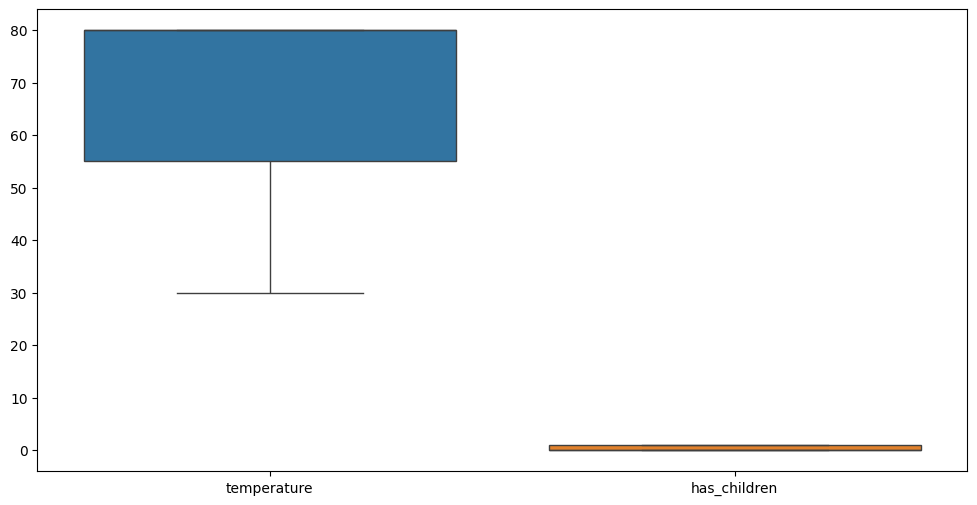

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['temperature', 'has_children']])
plt.show()

4. What proportion of the total observations chose to accept the coupon? 



In [69]:
coupon_acceptance_columns = ['acceptance']
# Summing up values in the coupon acceptance columns
total_coupon_accepted = data[coupon_acceptance_columns].sum().sum()
# Total number of observations
total_observations = len(data) * len(coupon_acceptance_columns)
# Proportion of observations that accepted the coupon
proportion_coupon_accepted = total_coupon_accepted / total_observations
print(f"The proportion of observations that accepted the coupon is: {proportion_coupon_accepted:.2%}")

The proportion of observations that accepted the coupon is: 56.84%


5. Use a bar plot to visualize the `coupon` column.

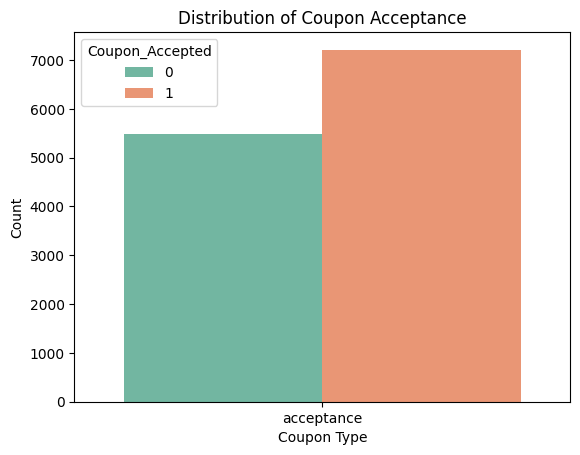

In [71]:
coupon_acceptance_columns = ['acceptance']

# Reshape the dataframe for Seaborn for coupon_acceptance_columns='acceptance'
df_melted = pd.melt(data, value_vars='acceptance', var_name='Coupon_Type', value_name='Coupon_Accepted')

# Creating a bar plot with colored columns
sns.countplot(x='Coupon_Type', hue='Coupon_Accepted', data=df_melted, palette='Set2')

# Adding labels and title
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Distribution of Coupon Acceptance')

# Display the plot
plt.show()

6. Use a histogram to visualize the temperature column.

In this version, I've added vertical dashed lines at the mean positions of 'temperature' for each weather state (sunny, rainy, snowy). You can customize the linestyle, color, and label according to your preferences.

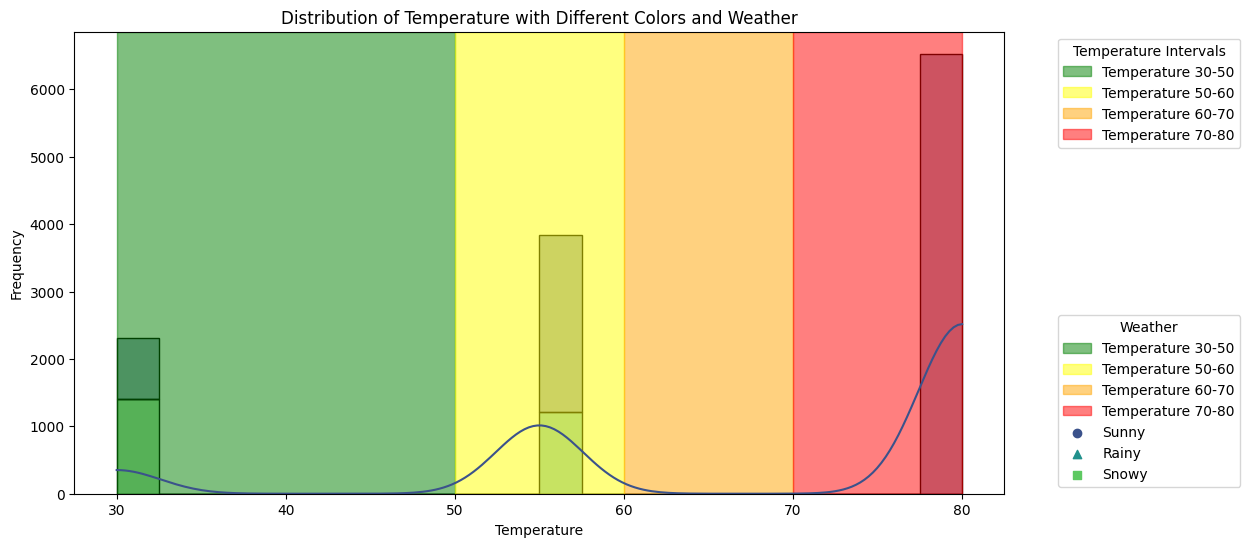

In [97]:
# Assume 'data' is your DataFrame
temperature_intervals = [(0, 30), (30, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
colors = ['blue', 'green', 'yellow', 'orange', 'red']

# Create a single histogram with different colors for temperature intervals and 'weather' as hue
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='temperature', bins=20, kde=True, hue='weather', palette='viridis', multiple='stack', edgecolor='black')

# Iterate over temperature intervals and colors to create different colored bins
for interval, color in zip(temperature_intervals[1:], colors[1:]):
    plt.axvspan(interval[0], interval[1], color=color, alpha=0.5, label=f'Temperature {interval[0]}-{interval[1]}')

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature with Different Colors and Weather')

# Display the legend with a better title
legend = plt.legend(title='Temperature Intervals', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding custom markers for the weather legend
weather_markers = {'Sunny': 'o', 'Rainy': '^', 'Snowy': 's'}

for i, (weather_category, color) in enumerate(zip(data['weather'].unique(), sns.color_palette('viridis', n_colors=len(data['weather'].unique())))):
    plt.scatter([], [], color=color, label=weather_category, marker=weather_markers.get(weather_category, 'o'))

# Display the combined legend
plt.legend(title='Weather', bbox_to_anchor=(1.05, 0), loc='lower left')

# Add the original legend back to the plot
plt.gca().add_artist(legend)

# Display the plot
plt.show()

In the next version, I've used a scatter plot where each point represents a combination of 'temperature' and 'weather'. Vertical dashed lines are still used to represent temperature intervals, and horizontal dashed lines represent the mean positions for each weather state. Adjust the marker style, size (s parameter), and other plot elements according to your preferences.

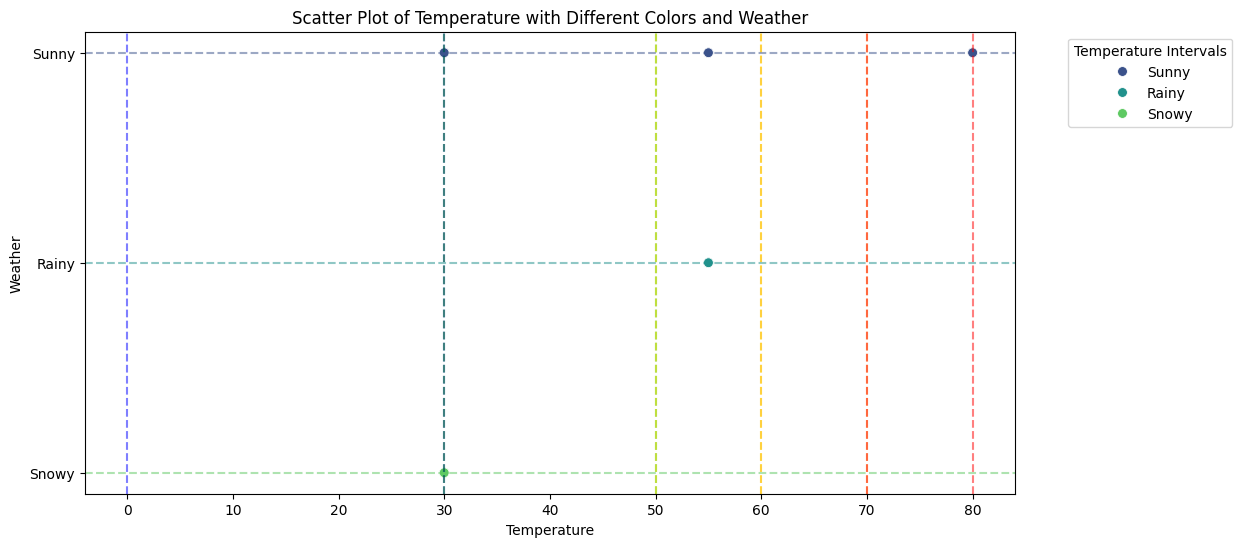

In [98]:
# Assume 'data' is your DataFrame
temperature_intervals = [(0, 30), (30, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
colors = ['blue', 'green', 'yellow', 'orange', 'red']

# Create a scatter plot with different colors for temperature intervals and 'weather' as hue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='temperature', y='weather', hue='weather', palette='viridis', marker='o', s=50)

# Iterate over temperature intervals and colors to create different colored markers
for interval, color in zip(temperature_intervals, colors):
    plt.axvline(interval[0], color=color, linestyle='--', alpha=0.5)
    plt.axvline(interval[1], color=color, linestyle='--', alpha=0.5)

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Weather')
plt.title('Scatter Plot of Temperature with Different Colors and Weather')

# Display the legend with a better title
plt.legend(title='Temperature Intervals', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding horizontal lines for each weather state
for i, (weather_category, color) in enumerate(zip(data['weather'].unique(), sns.color_palette('viridis', n_colors=len(data['weather'].unique())))):
    plt.axhline(i, color=color, linestyle='--', label=f'{weather_category} Mean', alpha=0.5)

# Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [235]:
# Assuming your original DataFrame is named 'df'
bar_coupons_df = data[data['Bar'].isin(['less1', '1 to 3', '4 to 8', 'gt8'])]

# Display the new DataFrame
print(bar_coupons_df)

           destination passanger weather  temperature  time  \
66     No Urgent Place     Alone   Sunny           55   2PM   
67     No Urgent Place   Friends   Sunny           80  10AM   
68     No Urgent Place   Friends   Sunny           80  10AM   
69     No Urgent Place   Friends   Sunny           80   2PM   
70     No Urgent Place   Friends   Sunny           80   2PM   
...                ...       ...     ...          ...   ...   
12657             Home     Alone   Sunny           80   6PM   
12658             Work     Alone   Rainy           55   7AM   
12659             Work     Alone   Snowy           30   7AM   
12660             Work     Alone   Snowy           30   7AM   
12661             Work     Alone   Sunny           80   7AM   

                      coupon expiration gender age    maritalStatus  ...  \
66        Restaurant less 20         1d   Male  46  Married partner  ...   
67              Coffee House         2h   Male  46  Married partner  ...   
68     Carry ou

2. What proportion of bar coupons were accepted?


In [236]:
# Assuming your original DataFrame is named 'data'
# and the new DataFrame containing only bar coupons is named 'bar_coupons_df'

# List of columns indicating coupon acceptance
coupon_acceptance_columns = ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

# Calculate the total number of bar coupons
total_bar_coupons = len(bar_coupons_df)

# Calculate the proportion of bar coupons accepted for each column
proportion_accepted_per_column = {}
for column in coupon_acceptance_columns:
    accepted_bar_coupons = bar_coupons_df[bar_coupons_df[column] == 1].shape[0]
    proportion_accepted = accepted_bar_coupons / total_bar_coupons
    proportion_accepted_per_column[column] = proportion_accepted

# Display the proportions
for column, proportion in proportion_accepted_per_column.items():
    print(f"The proportion of bar coupons accepted for {column} is: {proportion:.2%}")


The proportion of bar coupons accepted for toCoupon_GEQ5min is: 100.00%
The proportion of bar coupons accepted for toCoupon_GEQ15min is: 55.44%
The proportion of bar coupons accepted for toCoupon_GEQ25min is: 12.01%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
# Assuming your original DataFrame is named 'data'
coupon_acceptance_columns = ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

# Create two separate DataFrames based on bar frequency
bar_few_df = df[df['Bar'] == '1 to 3']
bar_less_df = df[df['Bar'] == 'less1']
bar_more_df = df[df['Bar'] == '4 to 8']
bar_great_df = df[df['Bar'] == 'gt8']

# Calculate acceptance rates for each group
acceptance_rate_few = bar_few_df['couponAccepted'].mean()
acceptance_rate_more = bar_more_df['couponAccepted'].mean()

# Display the acceptance rates
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_few:.2%}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more:.2%}")


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  